# Lecture 3-7: Multi-resolution Techniques

## 0.- Initialize filesystem and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pywavelets
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
import pydicom
from IPython.display import Image, display

## 1.- Multi-resolution Techniques and Fourier Analysis

Multi-resolution techniques analyze and process signals and images at **different scales and resolutions**, enabling the extraction of both **global and detailed features**.

The **Wavelet Transform** is a mathematical tool for multi-resolution analysis by **decomposing signals and images into different frequency components, while preserving spatial and temporal information**.

Unlike the **Fourier Transform**, which decomposes a signal into a set of **sines and cosines** (orthogonal functions) of different frequencies, **wavelet analysis** decomposes a signal into components that are **localized in both time and frequency**.

This makes wavelets particularly useful for analyzing **non-stationary signals**, where the frequency content changes over time.

#### **Time series and impulse function**

In a time series, each point represents a **precise moment in time**, providing temporal localization of events. In signal processing, instantaneous events within a time series can be modeled using the impulse function or **Dirac delta function**.

This function, $\delta(t)$, represents an instantaneous event at a specific moment in time, providing **perfect temporal localization** (indicating the exact time at which an event occur).

$$
\delta(t) =
\begin{cases}
0, & \text{for } t \neq 0 \\
\infty, & \text{for } t = 0
\end{cases}
$$

However, it **lacks information about the frequency content** of the signal (it cannot determine the different frequencies that make up the signal).

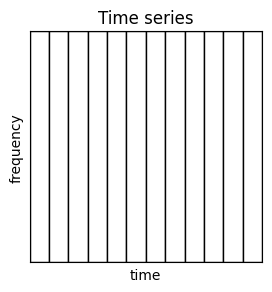

Figure 1: Resolution of time series in the time-frequency plane.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/time_series.png'
display(Image(filename=image_path, width=300))
caption = '<p style="text-align: left;">Figure 1: Resolution of time series in the time-frequency plane.</p>'
display({'text/html': caption}, raw=True)

#### **Fourier Transform**


The Fourier Transform (FT) only provides information about the **frequency content** of a signal, but **not about when in time those frequencies exists**.

$$F(\omega) = \int_{-\infty}^{\infty} f(t)\cdot e^{-j\omega t}\,dt$$

This **lack of time localization** allows its use for **stationary signals** but not for signals whose frequency characteristics change over time.


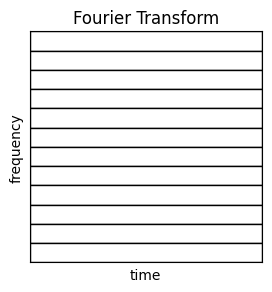

Figure 2: Resolution of the Fourier Transform in the time-frequency plane.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/fourier_transform.png'
display(Image(filename=image_path, width=300))
caption = '<p style="text-align: left;">Figure 2: Resolution of the Fourier Transform in the time-frequency plane.</p>'
display({'text/html': caption}, raw=True)

#### **Short-Time Fourier Transform**

The Short-Time Fourier Transform (STFT) was developed to provide both **time and frequency localization**.

The STFT divides the signal into **short, overlapping time windows** and then applies the Fourier Transform to each window. It is equivalent to assume that the signal is **stationary by portions**. This allows for the analysis of how the frequency content of the signal evolves over time.

$$F(\tau, \omega) = \int_{-\infty}^{\infty} f(t) \cdot w(t - \tau) \cdot e^{-j\omega t} \, dt$$

However, the **width of the window is fixed** in the STFT for the entire length of the signal. A narrow window provides good time resolution but poor frequency resolution, and vice versa.

This is equivalent to knowing **what frequency bands exist at what time intervals, bot do not provide information about the exact frequencies that exist for a specific time**.

This limitation is known as the **uncertainty principle in signal processing**, which states that there exists a **trade-off between time and frequency resolution**: if a signal is well localized in time (small $\Delta t$), it must be spread out in frequency (large $\Delta f$), and vice versa:

$$\Delta t \cdot \Delta f \ge \dfrac{1}{4\pi}$$

where:

*	$\Delta t$ represents the temporal uncertainty of the signal,
*	$\Delta f$ is the the spectral spread uncertainty of the signal.

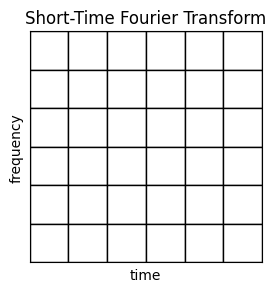

Figure 3: Resolution of the Short-Time Fourier Transform in the time-frequency plane.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/STFT.png'
display(Image(filename=image_path, width=300))
caption = '<p style="text-align: left;">Figure 3: Resolution of the Short-Time Fourier Transform in the time-frequency plane.</p>'
display({'text/html': caption}, raw=True)

## 2.- Wavelet Transform


The Wavelet Transform (WT) offers a solution to the limitations of both the Fourier Transform and the STFT by providing a **multi-resolution analysis** of the signal with **adaptive time-frequency resolution**.

**Wavelets** are small, oscillating functions that are **localized in both time and frequency**. They can be **stretched** or **compressed** and **shifted** through the signal to **analyze different portions at different scales**, providing a detailed view of both low-frequency (long-duration or large scale) and high-frequency (short-duration or small scale) components.

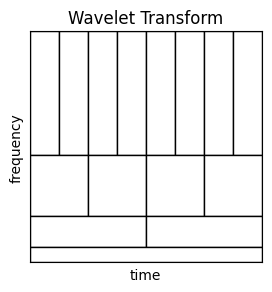

Figure 4: Resolution of the wavelet transform in the time-frequency plane.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/wavelet_transform.png'
display(Image(filename=image_path, width=300))
caption = '<p style="text-align: left;">Figure 4: Resolution of the wavelet transform in the time-frequency plane.</p>'
display({'text/html': caption}, raw=True)

Instead of sines and cosines, the WT uses a **mother wavelet function** $\psi(t)$ as basis functions, from which a **family of functions** can be derived:

$$\Psi_{(a, b)}(t) = \dfrac{1}{\sqrt{a}}\psi \left(\dfrac{t - b}{a}\right)$$

where $a$ and $b$ accounts for the **scale** and **shift** of the mother wavelet function, respectively: as $a$ increases, the function corresponds to higher levels (smaller scales), and as $b$ increases the function shifts towards the end of the signal.

By **shifting the complete signal for different scales** (from large to small), **features of all sizes** can be extracted from the signal.

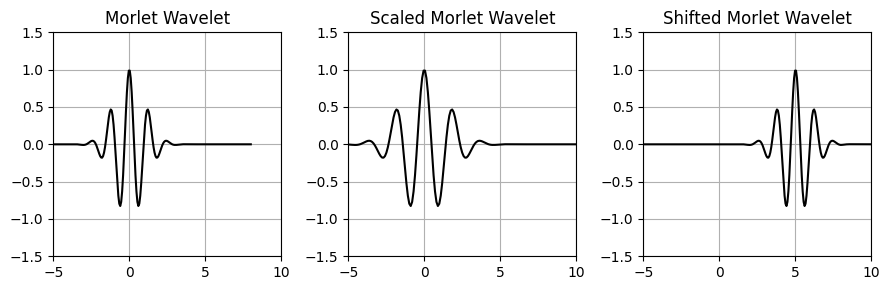

Figure 5: Continuous Morlet wavelet function, scaled and shifted.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/continuous_wavelet_function.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 5: Continuous Morlet wavelet function, scaled and shifted.</p>'
display({'text/html': caption}, raw=True)

In [ ]:
import pywt # Import the library PyWavelets

# List all available wavelet names
all_wavelets = pywt.wavelist()
print("Available wavelet functions:")
print(all_wavelets)

Available wavelet functions:
['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rb

The Continuous Wavelet Transform (CWT) of a signal $f(t)$  is defined as:

$$\mathcal{W}(a, b) = \frac{1}{\sqrt{|a|}} \int_{-\infty}^{\infty} f(t) \cdot \psi^*\left(\frac{t-b}{a}\right) \, dt$$

where:

*	$\psi(t)$ is the wavelet function (or mother wavelet), which is localized in both time and frequency,
*	$a$ is the scale parameter, which controls the dilation or compression of the wavelet (similar to frequency in the Fourier domain),
* $b$ is the translation parameter, which shifts the wavelet in time,
* $\psi^*(t)$ is the complex conjugate of the wavelet function.

Thus, the CWT can be interpreted as the process of computing the **convolution between a signal and a shifted wavelet mother function for different scales**.

Similarly to the Fourier Transform, when the wavelet function (for a specific scale, $a$, and shifting, $b$) **matches** the portion of the signal it applies, it provides **large** wavelet coefficients.

The advantage of the Wavelet Transform is its ability to provide a **varying time-frequency resolution**, in contrast to the STFT: good frequency resolution for low-frequency components and good time resolution for high-frequency components.

This adaptability makes wavelets suitable for time-frequency **analysis** of signals and images, **denoising and compression**, **enhancing** images, and **feature extraction**.

**Inverse Continuous Wavelet Transform**

As in other transforms, there exists the Inverse Continuous Wavelet Transform, which **reconstructs** the original signal from its **wavelet coefficients** obtained through the Continuous Wavelet Transform (CWT).

## 3.- Discrete Wavelet Transform

The Discrete Wavelet Transform (DWT) is the counterpart of the Continous Wavelet Transform, but applied to **discrete signals** and providing a **discrete time-frequency representation**.

### 3.1. 1D Discrete Wavelet Transform

The DWT operates by passing a signal through a **series of high-pass and low-pass filters** (Quadrature Mirror Filters, QMF), to decompose it into different frequency components, or **sub-bands**:

* The **low-pass filter** captures the **approximation** or low-frequency components of the signal.

* The **high-pass filter** captures the **detail** or high-frequency components.

* The QMF filters are related in such a way that their frequency responses are **complementary**.

This process is repeated through **multiple levels** of decomposition to produce a **hierarchical representation** of the signal. This is equivalent to a **filter-bank**, which is how the DWT is implemented in practice.

In the case of the DWT, the wavelet functions are not continuous; instead, they are represented by a **finite set of coefficients** that define the wavelet in a discrete manner.

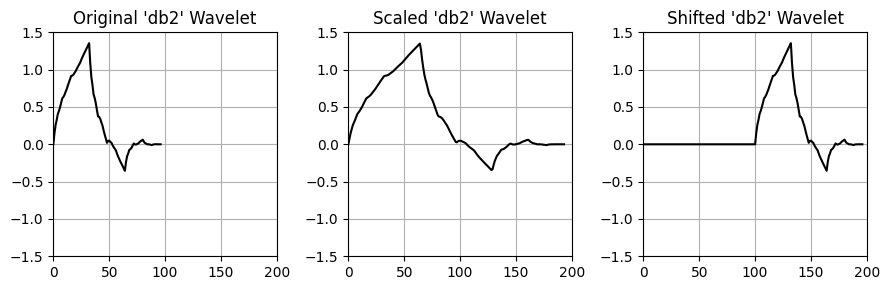

Figure 6: Discrete Daubechies 2 (db2) wavelet function, scaled and shifted.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/discrete_wavelet_function.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 6: Discrete Daubechies 2 (''db2'') wavelet function, scaled and shifted.</p>'
display({'text/html': caption}, raw=True)

Mathematically, the DWT of a discrete signal $x[n]$ is computed as:

$$c_{a}[k] = \sum_{n} x[n] \cdot \phi(2^{-j}n - k)$$

$$c_{d}[k] = \sum_{n} x[n] \cdot \psi(2^{-j}n - k)$$

where:

* $c_{a}[k]$ is the approximation coefficient at level $j$, representing the low-frequency content,
* $c_{d}[k]$ is the detail coefficient at level $j$, representing the high-frequency content,
* $\phi$ is the scaling function (associated with the low-pass filter),
* $\psi$ is the wavelet function (associated with the high-pass filter),
* $k$ indexes the position,
* $j$ represents the scale level.

Each approximation or detail coefficient ($c_a[k]$ or $c_d[k]$) is computed as the **discrete convolution** between the signal $x[n]$ and the scaling function ($\phi$) or wavelet function ($\psi$), which are scaled by a factor of $2^j$ and shifted by $k$ samples. The convolution is summed over the entire signal, and the resulting signal is then **downsampled** by a factor of 2.

<img src="https://eeweb.engineering.nyu.edu/iselesni/WaveletSoftware/image/one_D.jpg" alt="Caption" width="700"><p style="text-align: center;">Figure 7: DWT decomposition and reconstruction. Source: <a href="https://eeweb.engineering.nyu.edu/iselesni/WaveletSoftware/standard1D.html">www.eeweb.engineering.nyu.edu.</a></p>

**Discrete Wavelet Transform Reconstruction**

In the same way that the Discrete Fourier Transform decomposes a signal into its frequency components and then the Inverse DFT takes these frequency components and reassembles them to reconstruct the original signal, the Inverse DWT allows to **reconstruct** the original signal from the coefficients that the DWT computes.

**Multi-level decomposition**

This scheme of decomposition in two sub-bands can be extended to additional levels. The **approximation signal** is further **decomposed into new approximation and detail signals**, whereas the **detail signal remains unchanged**.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/22/Wavelets_-_Filter_Bank.png" alt="Caption" width="700"><p style="text-align: center;">Figure 8: 3-level filter bank. Source: <a href="https://en.wikipedia.org/wiki/Discrete_wavelet_transform">Wikipedia.</a></p>

For example, for a discrete signal with $N$ samples and frequency range from $0$ to $f_n$ (which represents the Nyquist frequency, equal to half the sampling rate of the signal) with 3 levels of decomposition:

* **Level 1**: is the highest resolution level (closest to the original signal). At this level, the DWT analyzes the highest frequency components (from $f_{n/2}$ to $f_n$) of the signal (details and fine structure). This level uses $N/2$ coefficients, since **higher frequency components require more data points** to represent the rapid changes with respect to higher levels of decomposition.
*	**Level 2**: this level captures a coarser approximation of the signal, analyzing lower frequencies compared to Level 1 (from $f_{n/4}$ to $f_{n/2}$). It uses **half the samples** of level 1 ($N/4$).
*	**Level 3**: this is an even coarser approximation, capturing the lowest frequencies (from $0$ to $f_{n/4}$), and uses fewer coefficients ($N/8$), reflecting that **lower frequency components** can be represented with **fewer data points**.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/dd/Wavelets_-_DWT_Freq.png" alt="Caption" width="700"><p style="text-align: center;">Figure 9: Frequency domain representation of the DWT. Source: <a href="https://en.wikipedia.org/wiki/Discrete_wavelet_transform">Wikipedia.</a></p>

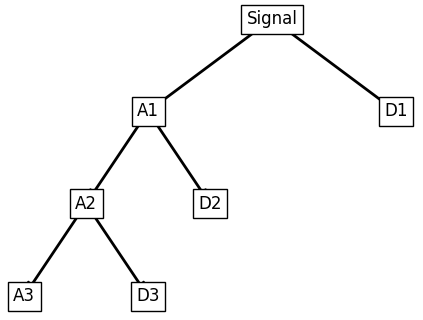

Figure 10: Wavelet decomposition in approximation (A) and detail (D) sub-bands.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/wavelet_decomposition.png'
display(Image(filename=image_path, width=400))
caption = '<p style="text-align: left;">Figure 10: Wavelet decomposition in approximation (A) and detail (D) sub-bands.</p>'
display({'text/html': caption}, raw=True)

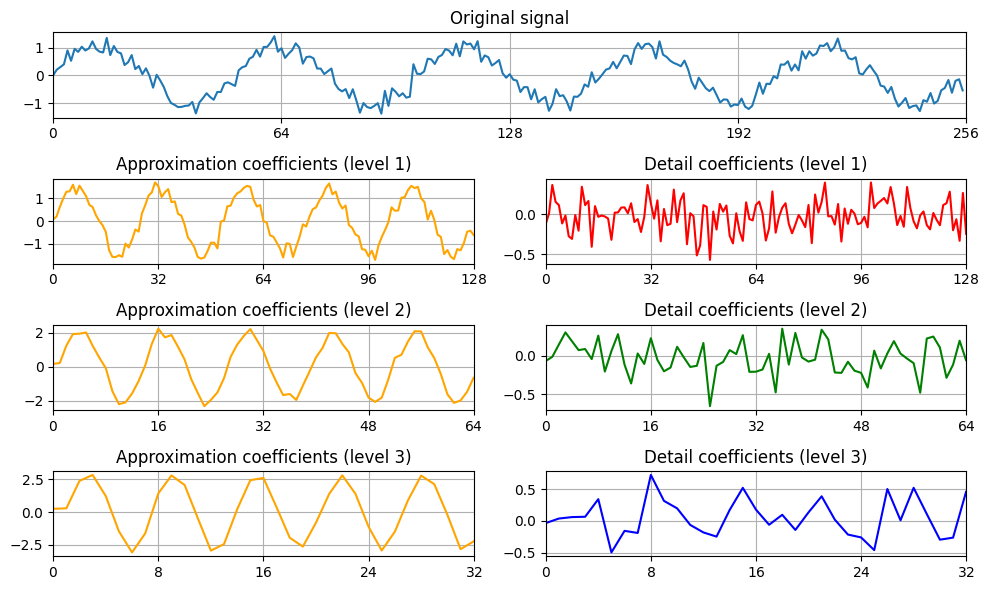

Figure 11: Approximation and detail coefficients of the wavelet decomposition of a signal.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/signal_and_wavelet_subbands.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 11: Approximation and detail coefficients of the wavelet decomposition of a signal.</p>'
display({'text/html': caption}, raw=True)

### 3.2. 2D Discrete Wavelet Transform


In image processing, the **2D DWT is applied separately along the rows and columns** of the image. This results in **four sub-bands** at each level of decomposition:

*	**LL** (Low-Low): contains the **approximation** of the image, representing the coarse scale features.
* **LH** (Low-High): captures **horizontal** details.
*	**HL** (High-Low): captures **vertical** details.
*	**HH** (High-High): captures **diagonal** details.

The process can be **repeated** on the LL sub-band to create **multiple levels** of decomposition, which allows for the analysis of the image at **different scales**.

<img src="https://www.researchgate.net/profile/Rameshwar-Talwar/publication/284499033/figure/fig2/AS:669412373848077@1536611755338/2D-Discrete-wavelet-transform.ppm" alt="Caption" width="700"><p style="text-align: center;">Figure 12: Wavelet decomposition of an image. Source: <a href="https://www.researchgate.net/figure/2D-Discrete-wavelet-transform_fig2_284499033">ResearchGate.</a></p>

Mathematically, the 2D DWT of an image $I(m, n)$ can be expressed as:

$$c_{LL}(i, j) = \sum_{m} \sum_{n} I(m, n) \cdot \phi(m - 2i) \cdot \phi(n - 2j)$$

$$c_{LH}(i, j) = \sum_{m} \sum_{n} I(m, n) \cdot \phi(m - 2i) \cdot \psi(n - 2j)$$

$$c_{HL}(i, j) = \sum_{m} \sum_{n} I(m, n) \cdot \psi(m - 2i) \cdot \phi(n - 2j)$$

$$c_{HH}(i, j) = \sum_{m} \sum_{n} I(m, n) \cdot \psi(m - 2i) \cdot \psi(n - 2j)$$

where:

* $c_{LL}(i, j)$ is the approximation coefficient (Low-Low sub-band),
* $c_{LH}(i, j)$ is the horizontal detail coefficient (Low-High sub-band),
* $c_{HL}(i, j)$ is the vertical detail coefficient(High-Low sub-band),
* $c_{HH}(i, j)$ is the diagonal detail coefficient (High-High sub-band),
* $I(m,n)$ is the input image at pixel position $(m,n)$,
* $\phi(m - 2i)$ and $\phi(n - 2j)$ represent the scaling function (low-pass filter) shifted by multiples of 2 (downsampling) in both the horizontal and vertical directions,
* $\psi(m - 2i)$ and $\phi(n - 2j)$ represent the wevelet function (high-pass filter) shifted by multiples of 2.


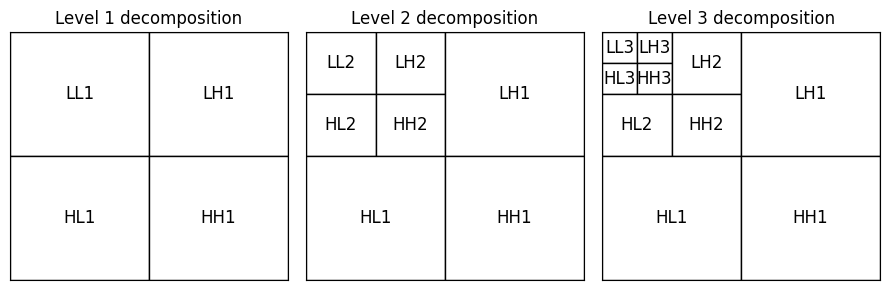

Figure 13: Level 3 decomposition of an image in sub-bands.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/image_decomposition.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 13: Level 3 decomposition of an image in sub-bands.</p>'
display({'text/html': caption}, raw=True)

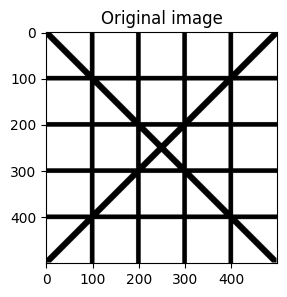

Figure 14: Example image for wavelet analysis.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/image_for_wavelet_analysis.png'
display(Image(filename=image_path, width=300))
caption = '<p style="text-align: left;">Figure 14: Example image for wavelet analysis.</p>'
display({'text/html': caption}, raw=True)

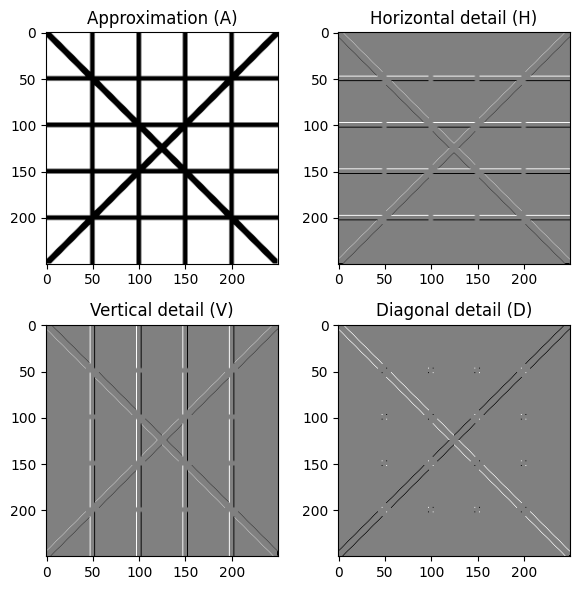

Figure 15: Example image decomposed in wavelet sub-bands.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/image_subbands.png'
display(Image(filename=image_path, width=600))
caption = '<p style="text-align: left;">Figure 15: Example image decomposed in wavelet sub-bands.</p>'
display({'text/html': caption}, raw=True)

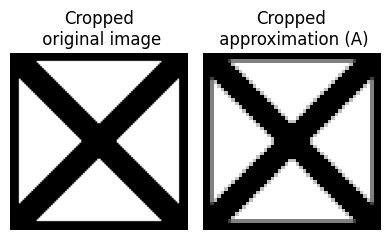

Figure 16: Zoom of the center of the original image (left) and approximation (right).

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/original_image_and_approximation_zoom.png'
display(Image(filename=image_path, width=400))
caption = '<p style="text-align: left;">Figure 16: Zoom of the center of the original image (left) and approximation (right).</p>'
display({'text/html': caption}, raw=True)

### 3.3. Wavelet Packet Decomposition


Wavelet Packet Decomposition (WPD) is an extension of the traditional Discrete Wavelet Transform (DWT) that offers a **more detailed and flexible way to analyze signals**.

In the **DWT**, a signal is iteratively decomposed into two components, approximations (low-frequency components) and details (high-frequency components), and  at each level of decomposition, **only the approximation component is further split** into new approximation and detail components, while the detail component remains unchanged.

In contrast, in the Wavelet Packet Decomposition, **both the approximation and detail components are computed at each level**. This means that WPD can analyze the signal in a more flexible way, providing a **full tree of subbands** at various frequency resolutions.

Similarly to the 2D DWT, the Wavelet Packet Decomposition can also be applied to **images**.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bc/Wavelets_-_WPD.png" alt="Caption" width="600"><p style="text-align: center;">Figure 17: 3-level wavelet packet decomposition. Source: <a href="https://en.wikipedia.org/wiki/Wavelet_packet_decomposition">Wikipedia.</a></p>

## 4.- PyWavelets


It is a Python library dedicated to **wavelet transform computations**. PyWavelets [1] provides tools for performing one-dimensional (1D), two-dimensional (2D), and even higher-dimensional discrete wavelet transforms (DWTs) and inverse wavelet transforms (IDWTs).

[1]: https://pywavelets.readthedocs.io/en/latest/index.html

In [ ]:
!pip install pywavelets
import pywt

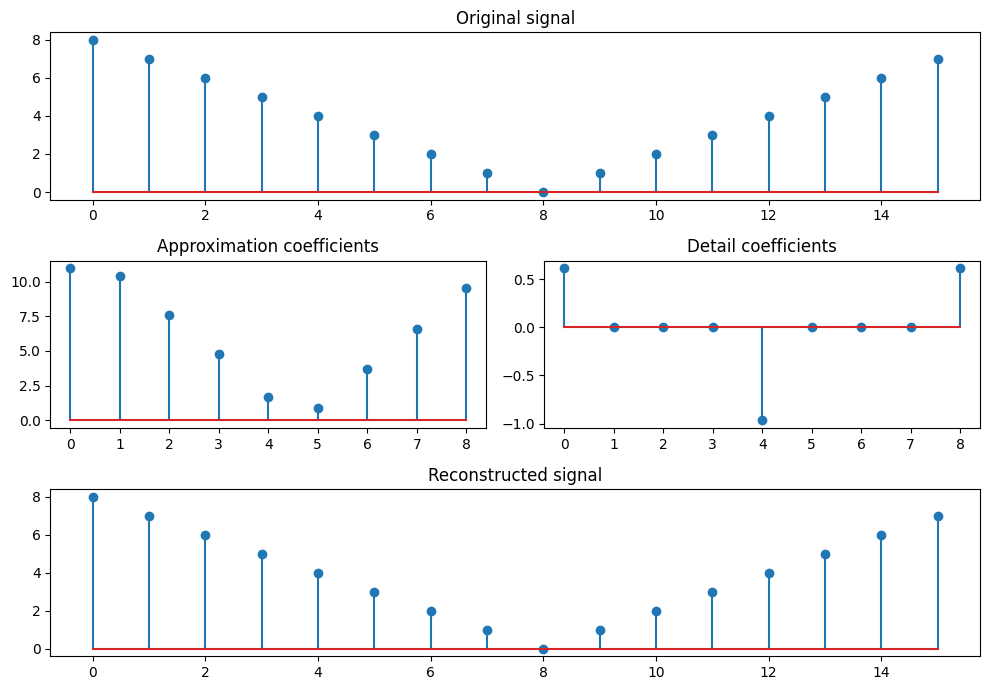

In [ ]:
# Create the signal (16 samples from 10 down to 0 and up to 10 again)
signal = np.array([8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7])

# Decompose the signal using the Discrete Wavelet Transform (DWT)
wavelet = 'db2'  # Discrete Daubechies wavelet function
(cA, cD) = pywt.dwt(signal, wavelet) # wavelet decomposition into approximation (cA) and details (cD)
# Reconstruct the signal (IDWT)
reconstructed_signal = pywt.idwt(cA, cD, wavelet)

# Plot the original signal, wavelet coefficients, and reconstructed signal
plt.figure(figsize=(10, 7))

plt.subplot(3, 1, 1)
plt.stem(signal)
plt.title('Original signal')

plt.subplot(3, 2, 3)
plt.stem(cA)
plt.title('Approximation coefficients')

plt.subplot(3, 2, 4)
plt.stem(cD)
plt.title('Detail coefficients')

plt.subplot(3, 1, 3)
plt.stem(reconstructed_signal)
plt.title('Reconstructed signal')

plt.tight_layout()
plt.show()

### 4.1. Length of the coefficient vectors

The coefficient vectors resulting from the wavelet transform (approximation coefficients and detail coefficients) **vary in length** depending on the signal size ($N$), the length of the wavelet function applied ($L$), and the level of decomposition ($j$).

The length of the coefficients at level $j$ can be approximated by:

$$\text{Length at level } j = \frac{N + L - 1}{2^j}$$

which accounts for the extended length due to **convolution** and the **downsampling** depending on the level.

**Padding** (adding samples) and **trimming** (removing samples) are commonly used to ensure the wavelet filter can handle the signal's boundaries and maintain accurate coefficient lengths after downsampling:

* **Padding** extends the signal at the boundaries to have **enough data points around the boundaries** for proper convolution during wavelet decomposition to avoid edge distortions.

* **Trimming:** after applying the wavelet transform, trimming removes extra values introduced by padding or convolution to adjust the length of the result.

* `pywt.wavedec` performs a **multi-level discrete wavelet transform** (DWT) on a signal, extracting approximation coefficients and detail coefficients. The output is a **list of arrays**, where each array contains the coefficients at a specific decomposition level.

  PyWavelets' `wavedec` function **automatically handles both padding and trimming** during wavelet decomposition. The default padding mode is “symmetric”, but PyWavelets supports other modes, such as zero-padding, periodic, and reflect-padding.

  During decomposition, `wavedec` applies **padding** at the signal's boundaries to ensure that the wavelet filter can be applied to the entire signal, even near the edges. After padding, the coefficients are **trimmed** to keep the resulting coefficients at the correct size, avoiding artifacts from extended boundaries.

In [ ]:
# Specify the wavelet
wavelet_name = 'db2'

# Create a wavelet object
wavelet = pywt.Wavelet(wavelet_name)

# Get the length of the wavelet filter
filter_length = wavelet.dec_len  # dec_len is the decomposition filter length

# Print the filter length
print(f"The length of the '{wavelet_name}' wavelet filter is: {filter_length}")

# Print the decomposition (low-pass and high-pass) and reconstruction coefficients
print("\nDecomposition low-Pass filter coefficients (dec_lo):")
print(wavelet.dec_lo)

print("\nDecomposition high-Pass filter coefficients (dec_hi):")
print(wavelet.dec_hi)

print("\nReconstruction low-Pass filter coefficients (rec_lo):")
print(wavelet.rec_lo)

print("\nReconstruction high-Pass filter coefficients (rec_hi):")
print(wavelet.rec_hi)

The length of the 'db2' wavelet filter is: 4

Decomposition low-Pass filter coefficients (dec_lo):
[-0.12940952255126037, 0.2241438680420134, 0.8365163037378079, 0.48296291314453416]

Decomposition high-Pass filter coefficients (dec_hi):
[-0.48296291314453416, 0.8365163037378079, -0.2241438680420134, -0.12940952255126037]

Reconstruction low-Pass filter coefficients (rec_lo):
[0.48296291314453416, 0.8365163037378079, 0.2241438680420134, -0.12940952255126037]

Reconstruction high-Pass filter coefficients (rec_hi):
[-0.12940952255126037, -0.2241438680420134, 0.8365163037378079, -0.48296291314453416]


Length of the original signal:  256
Length of the cA2 vector:  66
Length of the cD2 vector:  66
Length of the cD1 vector:  129


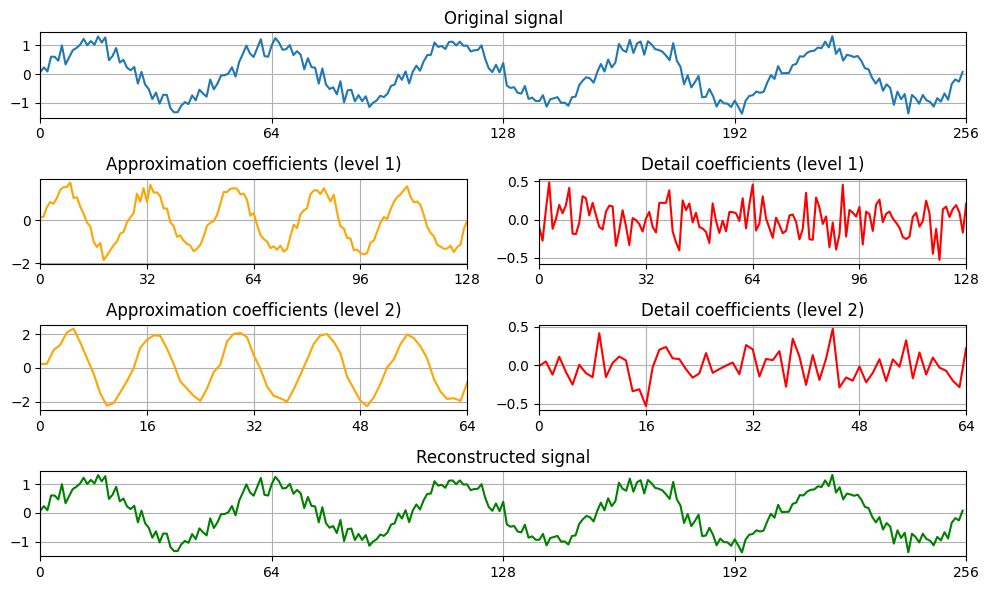

In [ ]:
# Create a sample 1D signal (sine wave plus some noise)
x = np.linspace(0, 1, 256)
signal = np.sin(2 * np.pi * 5 * x) + 0.2 * np.random.randn(256)

# Perform 2-level DWT decomposition using the 'db2' wavelet
# pywt.wavedec() returns a list of arrays that contain the wavelet decomposition
# coefficients of the input signal using the Discrete Wavelet Transform (DWT)
# coeffs = [approximation_coeffs_level_2, detail_coeffs_level_2, detail_coeffs_level_1]
#	coeffs[0] contains the approximation coefficients for level 2
# coeffs[1] and coeffs[2] contain the detail coefficients for levels 2 and 1, respectively
# pywt.wavedec() automatically handles padding (before DWT) and trimming (after)
coeffs = pywt.wavedec(signal, 'db2', level=2)

# Extract the approximation and detail coefficients for each level

# Method #1: single step extraction for all required coefficients
# cA2, cD2, cD1 = coeffs

# Method #2: extract the coefficients vector manually, one by one
cA2 = coeffs[0]  # Approximation coefficients at level 2 (highest level)
cD2 = coeffs[1]  # Detail coefficients at level 2
cD1 = coeffs[2]  # Detail coefficients at level 1

# Print the lengths of the signal and the coefficient vectors
print("Length of the original signal: ", len(signal))
print("Length of the cA2 vector: ", len(cA2)) # 66
print("Length of the cD2 vector: ", len(cD2)) # 66
print("Length of the cD1 vector: ", len(cD1)) # 129

# To obtain cA1, perform partial inverse DWT
cA1 = pywt.waverec([cA2, cD2], 'db2') # cA2 and cD2 are the coefficientes required
                                      # to reconstruct signal cA1

# Reconstruct the signal using all the coefficients
reconstructed_signal = pywt.waverec([cA2, cD2, cD1], 'db2')

# Plot the original signal and the decomposition
plt.figure(figsize=(10, 6))

# Original signal
plt.subplot(4, 1, 1)
plt.plot(signal, label='Original signal')
plt.title('Original signal')
plt.xticks([0, 64, 128, 192, 256], labels=["$0$", "$64$", "$128$", "$192$", "$256$"])
plt.xlim([0, 256])
plt.grid()

# Level 1: approximation and detail coefficients
plt.subplot(4, 2, 3)
plt.plot(cA1, label='Approximation coefficients (level 1)', color='orange')
plt.title('Approximation coefficients (level 1)')
plt.xticks([0, 32, 64, 96, 128], labels=["$0$", "$32$", "$64$", "$96$", "$128$"])
plt.xlim([0, 128])
plt.grid()

plt.subplot(4, 2, 4)
plt.plot(cD1, label='Detail coefficients (level 1)', color='red')
plt.title('Detail coefficients (level 1)')
plt.xticks([0, 32, 64, 96, 128], labels=["$0$", "$32$", "$64$", "$96$", "$128$"])
plt.xlim([0, 128])
plt.grid()

# Level 2: approximation and detail coefficients
plt.subplot(4, 2, 5)
plt.plot(cA2, label='Approximation coefficients (level 2)', color='orange')
plt.title('Approximation coefficients (level 2)')
plt.xticks([0, 16, 32, 48, 64], labels=["$0$", "$16$", "$32$", "$48$", "$64$"])
plt.xlim([0, 64])
plt.grid()

plt.subplot(4, 2, 6)
plt.plot(cD2, label='Detail coefficients (level 2)', color='red')
plt.title('Detail coefficients (level 2)')
plt.xticks([0, 16, 32, 48, 64], labels=["$0$", "$16$", "$32$", "$48$", "$64$"])
plt.xlim([0, 64])
plt.grid()

# Reconstructed signal
plt.subplot(4, 1, 4)
plt.plot(reconstructed_signal, label='Reconstructed signal', color='green')
plt.title('Reconstructed signal')
plt.xticks([0, 64, 128, 192, 256], labels=["$0$", "$64$", "$128$", "$192$", "$256$"])
plt.xlim([0, 256])
plt.grid()

plt.tight_layout()
plt.show()

### 4.2. Modification of the wavelet coefficients

Once the wavelet coefficients for different sub-bands have been calculated, they can be **selectively modified** before reconstruction to **enhance** the signal or image in a meaningful way.

Some detail coefficients, particularly those representing high-frequency components associated with **noise** or **artifacts**, can be **thresholded** to smooth the signal while preserving important details.

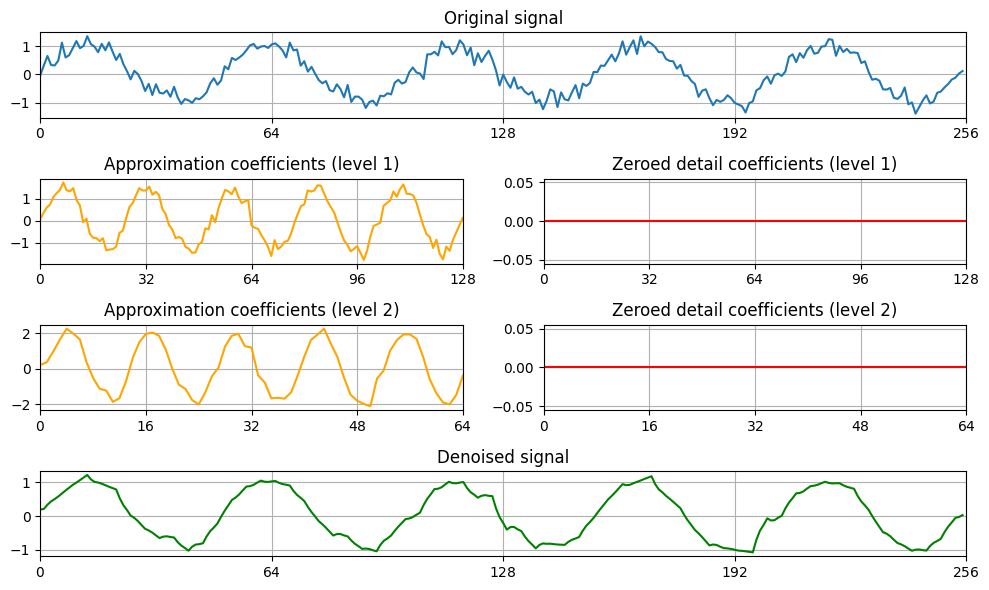

In [ ]:
# Create a sample 1D signal
x = np.linspace(0, 1, 256)
signal = np.sin(2 * np.pi * 5 * x) + 0.2 * np.random.randn(256)

# Perform 2-level DWT decomposition using the 'db2' wavelet
coeffs = pywt.wavedec(signal, 'db2', level=2)

# Extract the approximation and detail coefficients for each level
# pywt.wavedec(...) returns a list of coefficients arrays
cA2, cD2, cD1 = coeffs  # Single step extraction for all required coefficients

# To obtain cA1, perform partial inverse DWT
cA1 = pywt.waverec([cA2, cD2], 'db2')

# Reconstruct the signal using all the coefficients
reconstructed_signal = pywt.waverec([cA2, cD2, cD1], 'db2')

# Apply soft thresholding to all detail coefficients (skip the approximation coefficients)
threshold = 20
cD2_zeroed = pywt.threshold(cD2, threshold, mode='soft') # function for thresholding wavelet coefficients
cD1_zeroed = pywt.threshold(cD1, threshold, mode='soft') # usually applied to specific detail sub-bands

# Reconstruct the signal using the denoised coefficients
denoised_signal = pywt.waverec([cA2, cD2_zeroed, cD1_zeroed], 'db2')

# Plot the original signal and the decomposition
plt.figure(figsize=(10, 6))

# Original signal
plt.subplot(4, 1, 1)
plt.plot(signal, label='Original signal')
plt.title('Original signal')
plt.xticks([0, 64, 128, 192, 256], labels=["$0$", "$64$", "$128$", "$192$", "$256$"])
plt.xlim([0, 256])
plt.grid()

# Level 1: approximation and detail coefficients
plt.subplot(4, 2, 3)
plt.plot(cA1, label='Approximation coefficients (level 1)', color='orange')
plt.title('Approximation coefficients (level 1)')
plt.xticks([0, 32, 64, 96, 128], labels=["$0$", "$32$", "$64$", "$96$", "$128$"])
plt.xlim([0, 128])
plt.grid()

plt.subplot(4, 2, 4)
plt.plot(cD1_zeroed, label='Zeroed detail coefficients (level 1)', color='red')
plt.title('Zeroed detail coefficients (level 1)')
plt.xticks([0, 32, 64, 96, 128], labels=["$0$", "$32$", "$64$", "$96$", "$128$"])
plt.xlim([0, 128])
plt.grid()

# Level 2: approximation and detail coefficients
plt.subplot(4, 2, 5)
plt.plot(cA2, label='Approximation coefficients (level 2)', color='orange')
plt.title('Approximation coefficients (level 2)')
plt.xticks([0, 16, 32, 48, 64], labels=["$0$", "$16$", "$32$", "$48$", "$64$"])
plt.xlim([0, 64])
plt.grid()

plt.subplot(4, 2, 6)
plt.plot(cD2_zeroed, label='Zeroed detail coefficients (level 2)', color='red')
plt.title('Zeroed detail coefficients (level 2)')
plt.xticks([0, 16, 32, 48, 64], labels=["$0$", "$16$", "$32$", "$48$", "$64$"])
plt.xlim([0, 64])
plt.grid()

# Reconstructed signal
plt.subplot(4, 1, 4)
plt.plot(denoised_signal, label='Denoised signal', color='green')
plt.title('Denoised signal')
plt.xticks([0, 64, 128, 192, 256], labels=["$0$", "$64$", "$128$", "$192$", "$256$"])
plt.xlim([0, 256])
plt.grid()

plt.tight_layout()
plt.show()

## 5.- Applications of the 2D DWT to image processing

### 5.1. Decomposing and reconstructing an image

Wavelet decomposition involves applying the wavelet transform to an image, which results in a **multi-scale representation** of the image. This process splits the image into approximation and detail coefficients.

If the **coefficients** are **modified** during decomposition (e.g., for denoising or compression), the reconstructed image will reflect these changes, **preserving** important features while reducing noise or redundant information.

**Reconstruction** is the process of transforming the wavelet coefficients back into the original image. This is done by applying the inverse wavelet transform, which combines the approximation and detail coefficients to restore the image.

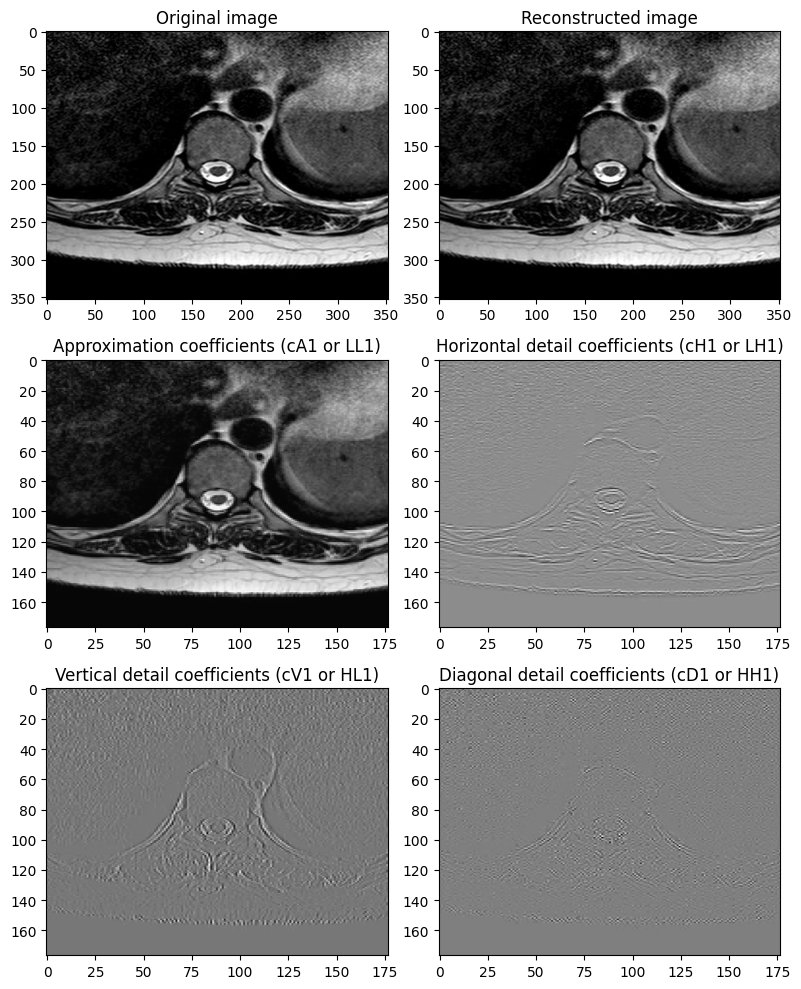

In [ ]:
# Load the image from Google Drive
image_path = '/content/drive/MyDrive/PIM/Images/IM000004.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply 2D DWT to the image (single level decomposition)
coeffs2 = pywt.dwt2(image, 'db2')  # Using 'db2' wavelet
# coeffs contains an array (cA) and a tupla (cH1, cV1, cD1) (parenthesis are required)
cA1, (cH1, cV1, cD1) = coeffs2  # Approximation, horizontal, vertical, diagonal detail coefficients
# Alternatively:
# cA1 = coeffs2[0] # extracts the approximation coefficients cA1
# cH1, cV1, cD1 = coeffs2[1] # extracts the tupla of level 1 detail coefficients

# Reconstruct the image from the coefficients
reconstructed_image = pywt.idwt2(coeffs2, 'db2')

# Plotting the results
plt.figure(figsize=(8, 10))

# Original image
plt.subplot(3, 2, 1)
plt.imshow(image, cmap='gray', aspect='auto')
plt.title("Original image")

# Reconstructed image
plt.subplot(3, 2, 2)
plt.imshow(reconstructed_image, cmap='gray', aspect='auto')
plt.title("Reconstructed image")

# Approximation coefficients
plt.subplot(3, 2, 3)
plt.imshow(cA1, cmap='gray', aspect='auto')
plt.title("Approximation coefficients (cA1 or LL1)")

# Horizontal detail coefficients
plt.subplot(3, 2, 4)
plt.imshow(cH1, cmap='gray', aspect='auto')
plt.title("Horizontal detail coefficients (cH1 or LH1)")

# Vertical detail coefficients
plt.subplot(3, 2, 5)
plt.imshow(cV1, cmap='gray', aspect='auto')
plt.title("Vertical detail coefficients (cV1 or HL1)")

# Diagonal detail coefficients
plt.subplot(3, 2, 6)
plt.imshow(cD1, cmap='gray', aspect='auto')
plt.title("Diagonal detail coefficients (cD1 or HH1)")

plt.tight_layout()
plt.show()

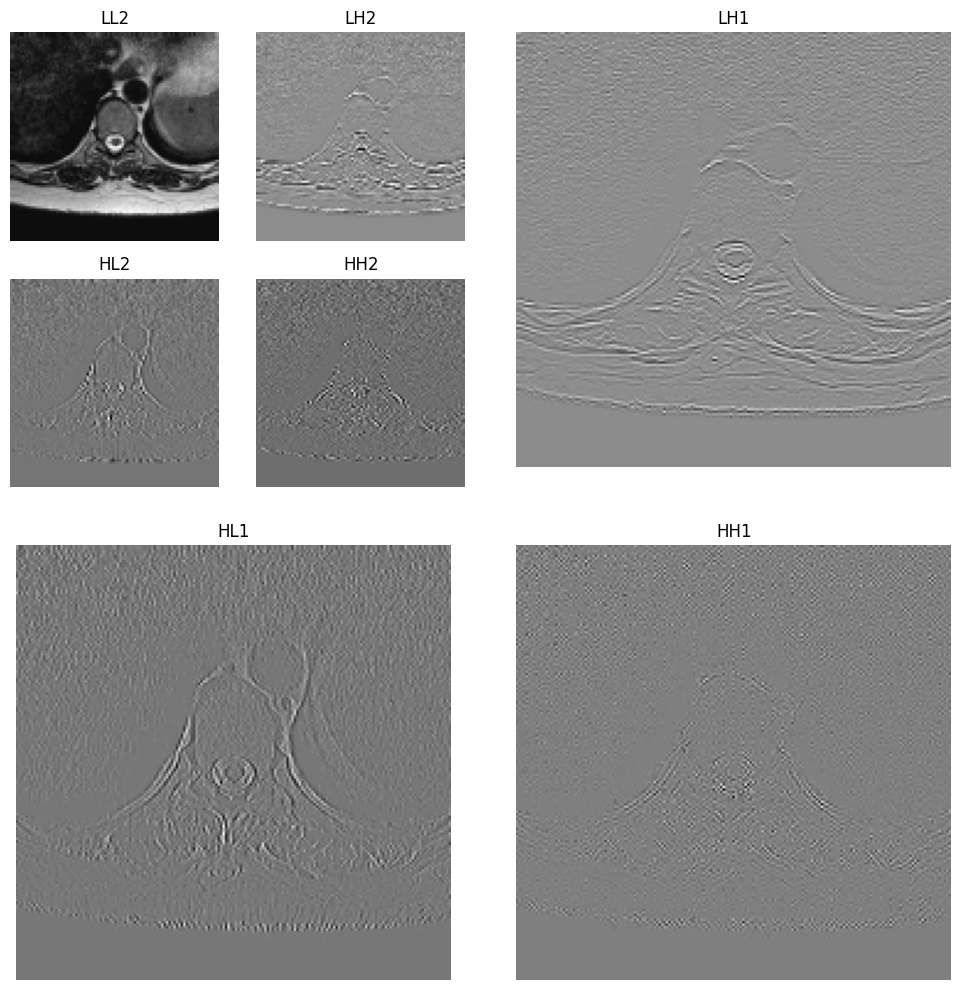

In [ ]:
# Load the image from Google Drive
image_path = '/content/drive/MyDrive/PIM/Images/IM000004.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform a 2-level DWT decomposition using the 'db2' wavelet
coeffs2 = pywt.wavedec2(image, 'db2', level=2)

# Extract the coefficients: unpack 'coeffs2': the returned value is a list where
# the first element is the approximation coefficients and the remaining elements
# are tuples (cHi, cVi, cDi) containing the detail coefficients for each level
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs2
# Alternatively:
# cA2 = coeffs2[0]                            # Approximation coefficients at level 2
# (cH2, cV2, cD2) = coeffs2[1] = coeffs2[-2]  # Detail coefficients at level 2 (H, V, D)
# (cH1, cV1, cD1) = coeffs2[2] = coeffs2[-1]  # Detail coefficients at level 1 (H, V, D)

# Reconstruct the image from the coefficients
reconstructed_image = pywt.waverec2(coeffs2, 'db2')

# Create a figure using subplot
plt.figure(figsize=(10, 10))

# Approximation coefficients (cA2)
plt.subplot(4, 4, 1)
plt.imshow(cA2, cmap='gray')
plt.title('LL2')
plt.axis('off')

# Horizontal detail coefficients (cH2)
plt.subplot(4, 4, 2)
plt.imshow(cH2, cmap='gray')
plt.title('LH2')
plt.axis('off')

# Vertical detail coefficients (cV2)
plt.subplot(4, 4, 5)
plt.imshow(cV2, cmap='gray')
plt.title('HL2')
plt.axis('off')

# Diagonal detail coefficients (cD2)
plt.subplot(4, 4, 6)
plt.imshow(cD2, cmap='gray')
plt.title('HH2')
plt.axis('off')

# Horizontal detail coefficients (cH1)
plt.subplot(2, 2, 2)
plt.imshow(cH1, cmap='gray')
plt.title('LH1')
plt.axis('off')

# Vertical detail coefficients (cV1)
plt.subplot(2, 2, 3)
plt.imshow(cV1, cmap='gray')
plt.title('HL1')
plt.axis('off')

# Diagonal detail coefficients (cD1)
plt.subplot(2, 2, 4)
plt.imshow(cD1, cmap='gray')
plt.title('HH1')
plt.axis('off')

plt.tight_layout()
plt.show()

### 5.2. Image Denoising

Denoising consists of **removing unwanted noise** from data while **preserving important features**.

In wavelet-based denoising, the signal or image is first **decomposed** into a set of wavelet coefficients, which represent the data at different scales. **Noise** typically manifests as **small, high-frequency components** in the wavelet domain.

By applying thresholding techniques to the wavelet coefficients, it is possible to **selectively suppress** these noise components while retaining the significant structures of the original signal.

After thresholding, the signal is **reconstructed** using the inverse wavelet transform, resulting in a **denoised version** that maintains the essential features of the original data.

#### **Thresholding**

Thresholding is used to suppress noise in the wavelet coefficients while preserving important signal features.

In **wavelet denoising**, the signal is first decomposed into wavelet **coefficients**, which represent the data at various scales. These coefficients are then **thresholded** to remove noise before the signal is reconstructed.

There are two primary types of thresholding used in wavelet denoising: **hard thresholding** and **soft thresholding**.


##### ***Hard thresholding***

In hard thresholding, any wavelet coefficient with an **absolute** value **below** a certain threshold is **set to zero**. This approach **removes small coefficients**, which are often associated with noise.

It can be defined mathematically as:

$$c' =
\begin{cases}
c, & \text{if } |c| > \lambda \\
0, & \text{if } |c| \leq \lambda
\end{cases}$$

where:

* $c'$ is the thresholded coefficient,
* $c$ is the original coefficient,
* $\lambda$ is the threshold value.

Hard thresholding is **simple** to implement and **preserves large coefficients**, which often correspond to important signal features. However, it can cause **discontinuities** in the reconstructed signal or introduce **artifacts**.


##### ***Soft thresholding***

In soft thresholding, coefficients are **shrunk towards zero** by the threshold value. Unlike hard thresholding, it not only sets coefficients below the threshold to zero but also **reduces the magnitude of the remaining coefficients** by the threshold value.

$$c' =
\begin{cases}
\text{sign}(c)(|c| - \lambda), & \text{if } |c| > \lambda \\
0, & \text{if } |c| \leq \lambda
\end{cases}$$

where:

* $\text{sign}(c)$ is the sign of the coefficient $c$ ($+1$ or $-1$),
* $|c| - \lambda$ is the magnitude reduction by the threshold.

Soft thresholding produces a **smoother signal**, **reducing** the risk of introducing **artifacts**, but can **attenuate important signal components**, especially when the threshold is too high.

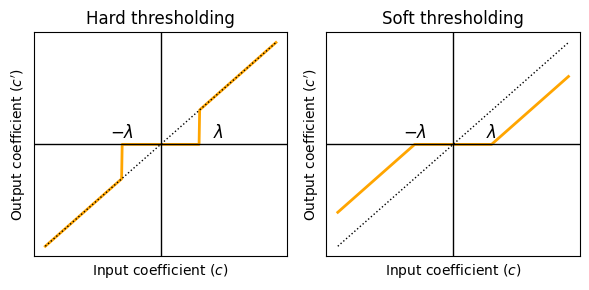

Figure 18: Hard thresholding (left) and soft thresholding (right).

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/hard_and_soft_thresholding.png'
display(Image(filename=image_path, width=600))
caption = '<p style="text-align: left;">Figure 18: Hard thresholding (left) and soft thresholding (right).</p>'
display({'text/html': caption}, raw=True)

##### ***Choosing the threshold value***

The value of the threshold, $\lambda$, plays an important role in the effectiveness of denoising. In this process, it is important to **distinguish between** small coefficients related to high frequency **details** and coefficients related to **noise**.

A common approach is to use the **universal threshold** $\lambda_{\text{univ}}$, given by:

$$\lambda_{\text{univ}} = \sigma \sqrt{2 \log(N)}$$

where:
* $\sigma$ is an estimate of the global noise standard deviation, calculated using the _Median Absolute Deviation (MAD)_ from the highest scale wavelet coefficients,
* $N$ is the total number of wavelet coefficients in the image.

The estimate of $\sigma$ is based on the following calculation:

$$\sigma = \frac{MAD}{0.6745} = \frac{\text{median}(|c_i - \tilde{C}|)}{0.6745} = \frac{\text{median}(|c_1 - \tilde{C}|, |c_2 - \tilde{C}|, \dots, |c_{N} - \tilde{C}|)}{0.6745}$$

where:

* $MAD$ is the Median Absolute Deviation,
* $c_i$ are the wavelet coefficients at the highest level (diagonal detail coefficients),
* $\tilde{C}$ is the median of wavelet coefficients $c_i$,
* the constant $0.6745$ normalizes the MAD under the assumption of Gaussian noise.

The **Median Absolute Deviation (MAD)** is a robust measure of dispersion, especially when dealing with data contaminated by noise or outliers.

In contrast to the standard deviation (SD), which is sensitive to extreme values or outliers (differences with respect to the mean value are squared), the MAD is based on the **median of absolute deviations**, so it is **less sensitive** to these extremes, making it a **more robust estimation of noise**.

MAD has been proven to be more suitable for multiscale techniques, as it allows a more reliable calculation of $\sigma$, **preventing outliers from affecting the noise estimation**.

*Unviersal vs adaptive threshold*

The universal threshold (**VisuShrink** method) is **applied to all coefficients at all levels and subbands** of the wavelet decomposition.

This approach might lead to **oversmoothing** in certain cases where **different subbands have different noise levels**.

To improve this, more advanced techniques like **BayesShrink** could be used to adapt thresholds to each subband.

#### **Denoising performance**

##### ***SNR (Signal-to-Noise Ratio)***

The performance of denoising is usually measured in terms of the **ratio between the signal and the noise**.

The classical definition of the Signal-to-Noise Ratio (**SNR**) is a measure that compares the level of the signal (useful information) to the level of the noise (unwanted interference), and is often expressed in decibels (dB):

$$\text{SNR} = 10 \log_{10} \left( \frac{P_{\text{signal}}}{P_{\text{noise}}} \right)$$

where $P_{\text{signal}}$ is the average power of the signal and $P_{\text{noise}}$ is the average power of the noise.

**Higher values** indicate that the signal is much stronger than the noise.

##### ***PSNR (Peak Signal-to-Noise Ratio)***

PSNR is a specialized measure for **image quality assessment for evaluating the quality of reconstruction** in image and video compression.

It compares the maximum possible value of the signal to the noise present in the image:

$$\text{PSNR} = 10 \log_{10} \left( \frac{L^2}{\text{MSE}} \right)$$

where	$L$ is the maximum possible pixel value of the image (for 8-bit images, $L = 255$), and	$\text{MSE}$ is the **Mean Squared Error** between the original and reconstructed image:

$$\text{MSE} = \frac{1}{MN} \sum_{i=1}^{M} \sum_{j=1}^{N} \left( I(i,j) - K(i,j) \right)^2$$

where $I(i,j)$ is the pixel value of the original image and $I'(i,j)$ is the pixel value of the reconstructed image, over an $M \times N$ image.

As in SNR, **higher PSNR values** (e.g., 30 dB to 50 dB) indicate better image quality, meaning the reconstructed image is closer to the original, whereas lower PSNR values suggest higher distortion between the original and processed image.

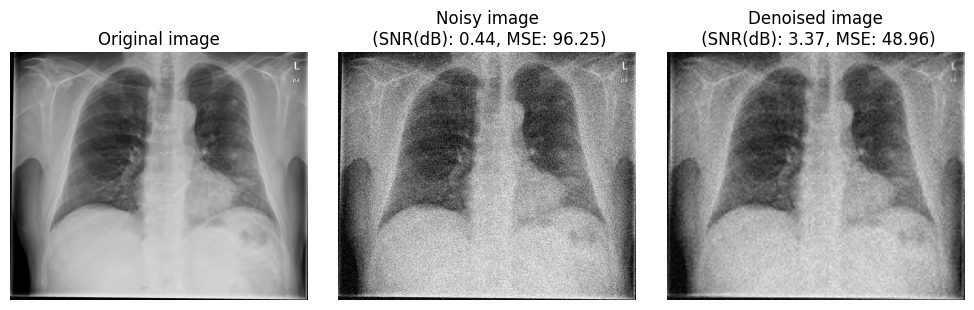

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise to the image
mean = 0
std_dev = 30  # Noise level
gaussian_noise = np.random.normal(mean, std_dev, image.shape)
noisy_image = image + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8) # to prevent values
                                             # lower than 0 and higher than 255

# Perform the DWT on the noisy image
wavelet = 'db2'
coeffs = pywt.wavedec2(noisy_image, wavelet, level=2)


# SOFT THRESHOLDING

# Apply soft thresholding to the wavelet coefficients
def soft_threshold(data, threshold):
    return np.sign(data) * np.maximum(np.abs(data) - threshold, 0)

# Estimate the universal threshold (VisuShrink)
sigma = np.median(np.abs(coeffs[-1])) / 0.6745  # uses the highest scale (coeffs[-1])
threshold = sigma * np.sqrt(2 * np.log(noisy_image.size))


# DENOISING

# Keep the approximation coefficients unchanged
cA = coeffs[0]

# Apply soft thresholding to the detail coefficients for level 2
cH2_thresh = soft_threshold(coeffs[1][0], threshold)  # Horizontal detail coefficients
cV2_thresh = soft_threshold(coeffs[1][1], threshold)  # Vertical detail coefficients
cD2_thresh = soft_threshold(coeffs[1][2], threshold)  # Diagonal detail coefficients

# Apply soft thresholding to the detail coefficients for level 1
cH1_thresh = soft_threshold(coeffs[2][0], threshold)  # Horizontal detail coefficients
cV1_thresh = soft_threshold(coeffs[2][1], threshold)  # Vertical detail coefficients
cD1_thresh = soft_threshold(coeffs[2][2], threshold)  # Diagonal detail coefficients

# Form the coeffs_thresh list directly
coeffs_thresh = [
    cA,
    (cH2_thresh, cV2_thresh, cD2_thresh),
    (cH1_thresh, cV1_thresh, cD1_thresh)
]


# Reconstruct the image using the thresholded coefficients
denoised_image = pywt.waverec2(coeffs_thresh, wavelet)
denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)


# Calculate SNR and MSE
def calculate_snr(image1, image2):
    noise = image1 - image2
    signal_power = np.mean(image1 ** 2)
    noise_power = np.mean(noise ** 2)

    # Calculate Signal-to-Noise Ratio in decibels (dB)
    snr = 10 * np.log10(signal_power / noise_power)

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((image1 - image2) ** 2)

    return snr, mse

# Compare the noisy image and the denoised image with the original image
snr_noisy, mse_noisy = calculate_snr(image, noisy_image)
snr_denoised, mse_denoised = calculate_snr(image, denoised_image)


# Visualize original, noisy, and denoised images
plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f"Noisy image\n (SNR(dB): {snr_noisy:.2f}, MSE: {mse_noisy:.2f})")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title(f"Denoised image\n (SNR(dB): {snr_denoised:.2f}, MSE: {mse_denoised:.2f})")
plt.axis('off')

plt.tight_layout()
plt.show()

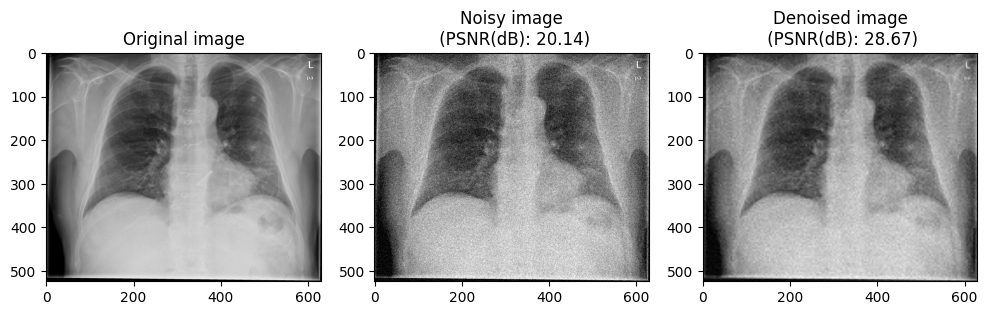

In [ ]:
from skimage.restoration import estimate_sigma, denoise_wavelet
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load the image
image = cv2.imread('/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise to the image using skimage's random_noise function
noisy_image = random_noise(image, mode='gaussian', mean=0, var=0.01)
noisy_image = np.clip(noisy_image * 255, 0, 255).astype(np.uint8)

# Estimate noise standard deviation using scikit-image's estimate_sigma
sigma_est = estimate_sigma(noisy_image)

# Perform wavelet denoising using scikit-image's denoise_wavelet
# - 'mode' can be 'hard' or 'soft' (thresholding)
# - 'method' can be 'VisuShrink' or 'BayesShrink'
# - 'rescale_sigma' adjusts the noise estimate (sigma) for wavelet-based scaling,
#   ensuring accurate thresholding based on the decomposition levels. It rescale
#   sigma based on the wavelet used. 'True' makes denoising more accurate by
#   adapting the noise estimate to each level
denoised_image = denoise_wavelet(noisy_image, sigma=sigma_est, method='VisuShrink',
                  wavelet='db2', mode='soft', wavelet_levels=2, rescale_sigma=True)

# Clip values to ensure they are within the valid range for an 8-bit image
denoised_image = np.clip(denoised_image * 255, 0, 255).astype(np.uint8)

# Calculate PSNR and MSE using skimage's psnr and custom formula
psnr_noisy = psnr(image, noisy_image)
psnr_denoised = psnr(image, denoised_image)

# Visualize original, noisy, and denoised images
plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original image")

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f"Noisy image\n (PSNR(dB): {psnr_noisy:.2f})")

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title(f"Denoised image\n (PSNR(dB): {psnr_denoised:.2f})")

plt.tight_layout()
plt.show()

## References

* González, Rafael C., _Digital image processing: Chapter 7 (Wavelet and Other Image Transforms)_. Prentice Hall,. 2018. 9780132345637

* A. Graps, _An Introduction to Wavelets_, IEEE Computational Science and Engineering, 2(2), 1995

* L. B. Dorini, N. J. Leite, _Multiscale Methods for Image Processing: The Wavelet and the Scale-Space Approaches_,
2009 Tutorials of the XXII Brazilian Symposium on Computer Graphics and Image Processing (2009)

* G. R. Lee, R. Gommers, F. Wasilewski, K. Wohlfahrt, A. O'Leary, _PyWavelets: A Python package for wavelet analysis_,  Journal of Open Source Software, 4(36), 1237 (2019)

